In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the results
df = pd.read_csv('../Data/Predicted_maps/Automated/alt_corr/with_CV/no_SM/no_FS_best_HP_buffer_150/RF_results.csv')

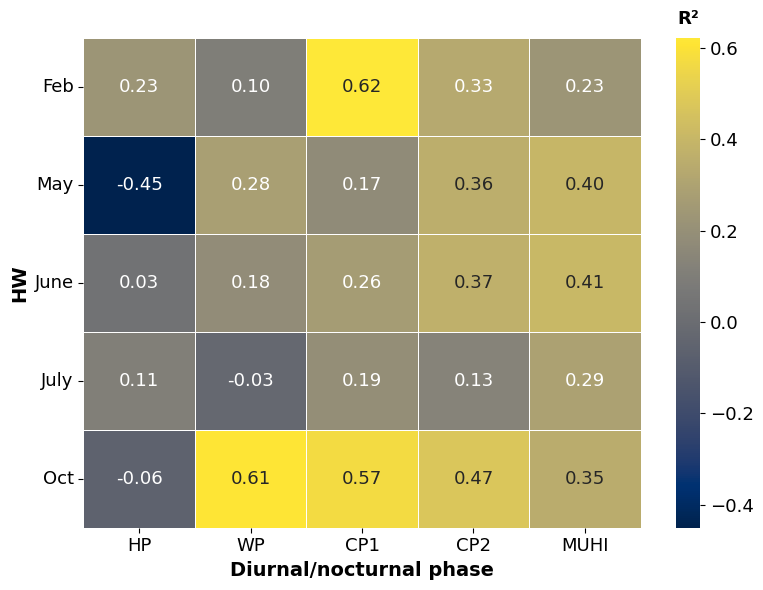

In [4]:
phase_order = ['HP', 'WP', 'CP1', 'CP2', 'MUHI']
month_order = ['Feb', 'May', 'June', 'July', 'Oct']

df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

heatmap_data = df.pivot(index='month', columns='hour', values='R2_test')
heatmap_data = heatmap_data.loc[month_order, phase_order]

plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    annot_kws={"fontsize": 13},
    cmap='cividis',
    fmt=".2f",
    cbar_kws={
        'label': None,
        'orientation': 'vertical'
    },
    linewidths=0.5,
    linecolor='white'
)

# Set larger font for axis labels and tick labels
ax.set_xlabel('Diurnal/nocturnal phase', weight='bold', fontsize=14)
ax.set_ylabel('HW', weight='bold', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=13, rotation=0)

# Move colorbar label to the top
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13) 
cbar.ax.set_title("R²", fontsize=13, weight='bold', pad=10)

plt.tight_layout()
plt.savefig('R2_heatmap2.png', dpi=600)
plt.show()

In [12]:
pwd

'C:\\Users\\matey\\OneDrive - Politecnico di Milano\\PhD\\Research\\Netatmo_interpolation_RS_Article\\Codes'

# Feature importance

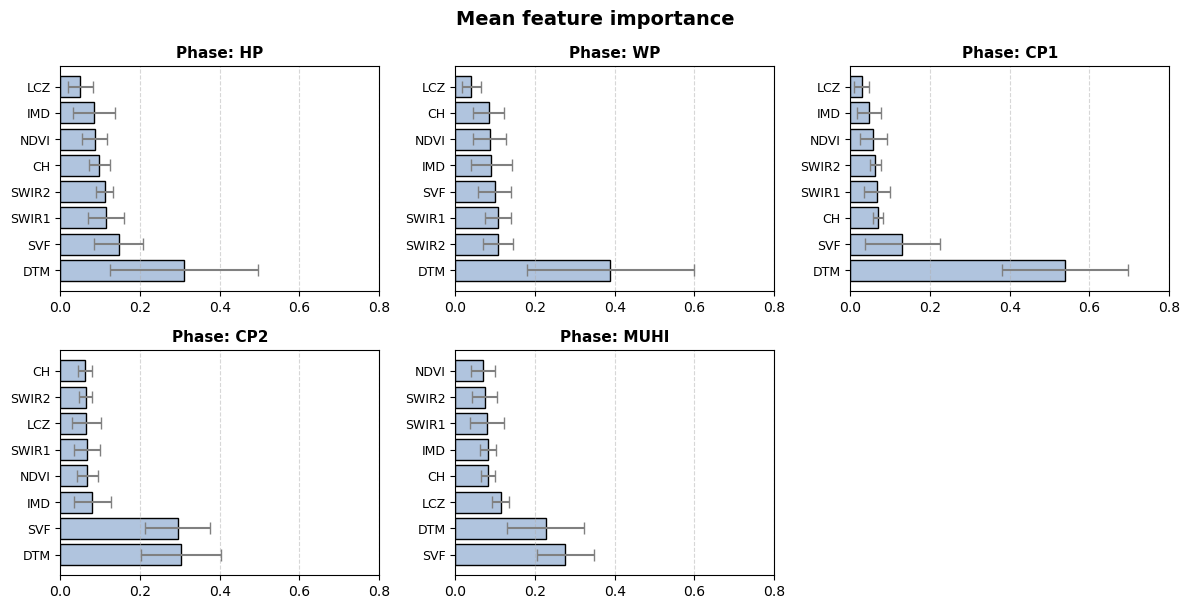

In [8]:
predictors = ['LCZ', 'DTM', 'SWIR1', 'SWIR2', 'CH', 'SVF', 'NDVI', 'IMD']
phases = ['HP', 'WP', 'CP1', 'CP2', 'MUHI']

x_min = 0  
x_max = 0.8  

# Plot setup: 2 rows x 3 columns (last subplot will be empty)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6.5), sharex=False)
axes = axes.flatten()

for i, phase in enumerate(phases):
    sub_df = df[df['hour'] == phase]
    
    mean_vals = sub_df[predictors].mean()
    std_vals = sub_df[predictors].std()
    
    # Sort values for readability
    sorted_idx = mean_vals.sort_values().index
    mean_vals = mean_vals[sorted_idx]
    std_vals = std_vals[sorted_idx]
    
    ax = axes[i]
    y_pos = np.arange(len(predictors))
    
    ax.barh(y_pos, mean_vals, xerr=std_vals, color='lightsteelblue', edgecolor='black',
            ecolor='gray', capsize=4)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(mean_vals.index, fontsize=9)
    ax.invert_yaxis()
    ax.set_title(f'Phase: {phase}', fontsize=11, weight='bold')
    ax.set_xlim(x_min, x_max)
    ax.grid(True, axis='x', linestyle='--', alpha=0.5)

# Remove last empty subplot
fig.delaxes(axes[-1])

fig.suptitle("Mean feature importance", fontsize=14, weight='bold')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("feature_importance_per-phase.png", dpi=600)
plt.show()

In [9]:
pwd

'C:\\Users\\matey\\OneDrive - Politecnico di Milano\\PhD\\Research\\Netatmo_interpolation_RS_Article\\Codes'

# RMSE

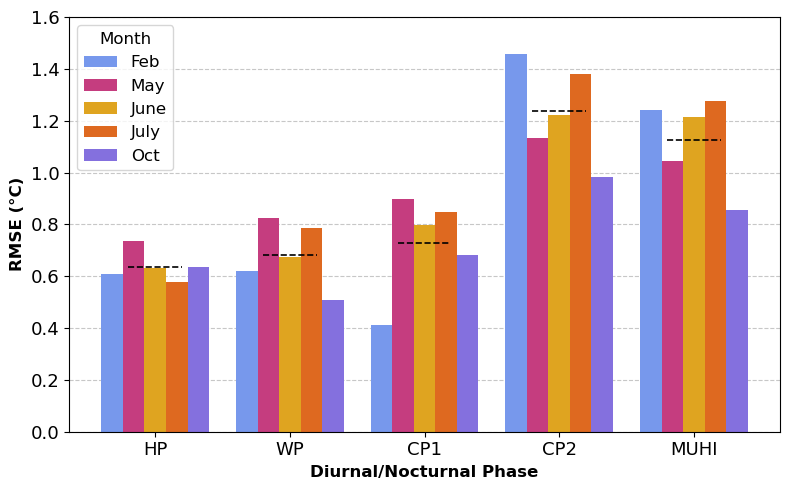

In [3]:
custom_palette = {
    'Feb': '#648FFF',   # soft blue
    'May': '#DC267F',   # gentle green
    'June': '#FFB000',  # pale yellow
    'July': '#FE6100',  # warm peach
    'Oct': '#785EF0'    # smooth soft orange
}

avg_per_phase = df.groupby('hour')['RMSE_test'].mean()

plt.figure(figsize=(8, 5))
ax = plt.gca()

# Grid behind bars
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# Barplot
sns.barplot(
    data=df,
    x='hour',
    y='RMSE_test',
    hue='month',
    palette=custom_palette,
    errorbar='sd',
    ax=ax
)

# Raise bars above grid
for patch in ax.patches:
    patch.set_zorder(2)

# Add average lines per phase
x_labels = df['hour'].unique()
x_order = ['HP', 'WP', 'CP1', 'CP2', 'MUHI']  # if you want a specific order
bar_width = 0.8 / len(df['month'].unique())  # width of a single bar in group
offset = -0.4 + bar_width * len(df['month'].unique()) / 2

for i, phase in enumerate(x_order):
    avg_val = avg_per_phase[phase]
    ax.hlines(y=avg_val, xmin=i + offset - 0.2, xmax=i + offset + 0.2,
              colors='black', linestyles='dashed', linewidth=1.2, zorder=3)

# Labels, limits, and style
ax.set_xlabel("Diurnal/Nocturnal Phase", fontsize=12, weight='bold')
ax.set_ylabel("RMSE (°C)", fontsize=12, weight='bold')
ax.set_ylim(0, 1.6)
ax.tick_params(labelsize=13)
ax.legend(title='Month', title_fontsize=12, fontsize=12)

plt.tight_layout()
plt.savefig("rmse_barplot2.png", dpi=600)
plt.show()